In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
coordenadas = pd.read_csv('/content/coords.csv')
coordenadas

,latitude,longitude
0,19.111841,72.910729
1,19.111342,72.908387
2,19.137815,72.914085
3,19.119677,72.905081
4,19.119677,72.905081
...,...,...
64,19.113827,72.893833
65,19.119677,72.905081
66,19.114100,72.894985
67,19.107491,72.901760


In [3]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=3.5/6371., min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coordenadas))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

coord_l = coordenadas.copy()
coord_l['labels'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(coordenadas, labels))
# #############################################################################

Estimated number of clusters: 4
Estimated number of noise points: 2
Silhouette Coefficient: 0.938


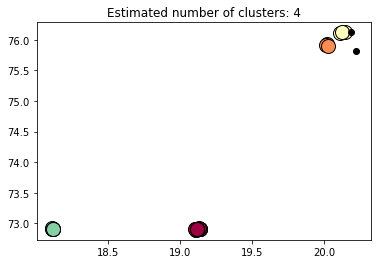

In [4]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
      # Black used for noise.
      col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = coord_l[class_member_mask & core_samples_mask]
    plt.plot(xy['latitude'], xy['longitude'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = coordenadas[class_member_mask & ~core_samples_mask]
    plt.plot(xy['latitude'], xy['longitude'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()